# Coffee and Productivity

Does coffee consumption in a population correlate with higher productivity as measured in GDP per hour worked?

Background: On an individual level, consumption of coffee and its active ingredient, caffeine (a stimulant), is associated with higher levels of “energy” and “productivity”. But in a given population, such as a nation-state, does higher coffee consumption indicate a higher level of productivity? 


In [243]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
from statistics import mean
import pandas as pd
import numpy as np
import seaborn as sns


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
coffee_data_to_load = "data/project_data.csv"

# Read the Data
coffee_data = pd.read_csv(coffee_data_to_load)

coffee_data.head()

# plt.rcParams["figure.figsize"] = 16,9

plt.rcParams["figure.figsize"] = 16,9


## 1-1. World Coffee Consumption by Year: Does World Consume More Coffee Over Time?
mean coffee consumption by year (line graph) - 
x axis = year
y axis = coffee amount
Karen

In [208]:
year = coffee_data.iloc[:,1].unique()
year

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=int64)

In [210]:
avg_coffee_consumption = round(coffee_data.groupby("Year")["Coffee Consumed"].mean(),2)
avg_coffee_consumption

Year
1999    2327.86
2000    2224.30
2001    2309.70
2002    2322.27
2003    2401.37
2004    2466.10
2005    2421.63
2006    2467.67
2007    2491.73
2008    2482.43
2009    2436.60
2010    2506.87
2011    2496.83
2012    2516.60
2013    2584.40
Name: Coffee Consumed, dtype: float64

## 1-2. Coffee Consumption Trend by Country: How Much Coffee Is Consumed by Year (in Total)?
use project_data.csv to generate the plot. (line graph) - mean by year. Plot in line.
Karen

In [107]:
country = coffee_data.iloc[:, 0].unique()
country

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Czech Republic',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Ireland', 'Italy', 'Japan', 'Latvia', 'Lithuania',
       'Luxembourg', 'Netherlands', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russian Federation', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'United Kingdom', 'United States of America'],
      dtype=object)

In [149]:
avg_coffee_consumption_ctry = round(coffee_data.groupby(["Country Name", "Year"])["Coffee Consumed"].mean(),2)
avg_coffee_consumption_ctry.head()

Country Name  Year
Austria       1999    1123
              2000     875
              2001    1013
              2002     926
              2003     720
Name: Coffee Consumed, dtype: int64

## new code

In [204]:
## Graph 1

# Store the Productivity(GDP per hour worked) Data Grouped by Country and Year 
productivity_trend = coffee_data[["Country Name","Year","gdp_per_hour_worked"]]

# Preview DataFrame
df_productivity_trend =productivity_trend.pivot(index="Year", columns="Country Name", values="gdp_per_hour_worked")

# Generate the Plot (with Error Bars)
graph_productivity_trend = df_productivity_trend.mean(axis=1).plot()

#style
graph_productivity_trend.set_ylabel("Productivity (GDP per hour worked)")
graph_productivity_trend.set_xlabel("Year")

# Draw line of overall coffee consumption 
# df_productivity_trend.mean(axis=1).plot()

# Save the Figure
#plt.savefig('graph_productivity_trend.png', bbox_inches="tight")

# Graph 2

# Generate the Plot 
graph_productivity_by_country = df_productivity_trend.plot()

#style
graph_productivity_by_country.set_ylabel("Productivity (GDP per hour worked)")
graph_productivity_by_country.set_xlabel("Year")

# Draw line of coffee consumption by country
# df_productivity_trend.plot()

# Save the Figure
#plt.savefig('graph_productivity_by_country.png', bbox_inches="tight")

# Show the Figure
#plt.show()


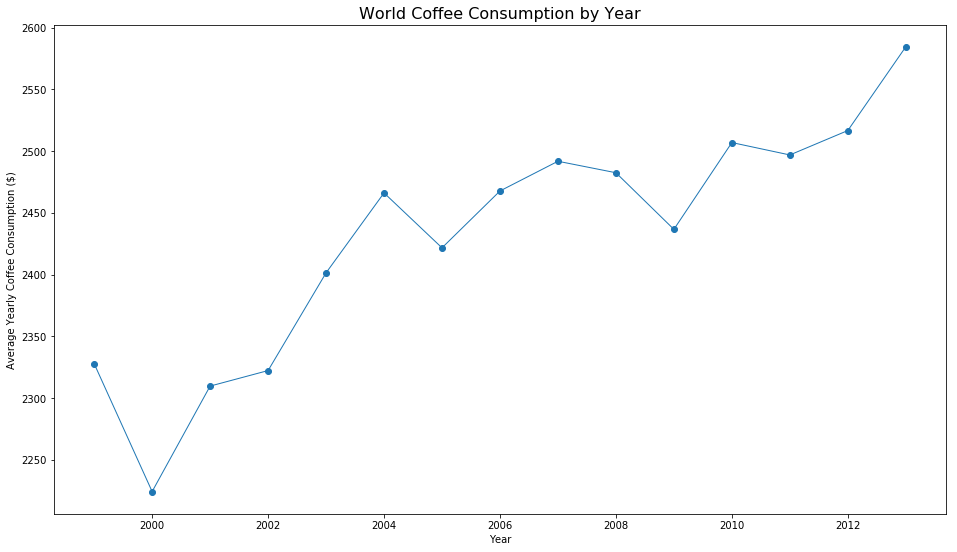

In [229]:
# Create line graph to illlustrate mean coffee consumption by year

coffee_consumption_by_ctry = coffee_data[["Country Name","Year","Coffee Consumed"]]
#avg_coffee_consumption = round(coffee_data.groupby("Year", "Country")["Coffee Consumed"].mean(),2)

coffee_consumption_pivot = coffee_consumption_by_ctry.pivot(index="Year", columns="Country Name", values="Coffee Consumed")

#graph_productivity_trend = coffee_consumption_pivot.mean(axis=1).plot(linewidth=1, marker="o")
avg_cofee_consumption_data = coffee_consumption_pivot.mean(axis=1)

plt.plot(year, avg_cofee_consumption_data, linewidth=1, marker="o")
plt.title("World Coffee Consumption by Year",{"fontsize":16})
plt.ylabel("Average Yearly Coffee Consumption ($)")
plt.xlabel("Year")
#set_xlim(min(year), max(year)
       
# Create line graph
#plt.savefig(avg_coffee_consumption)
plt.show()

In [223]:
coffee_consumption_pivot

Country Name,Austria,Belgium,Bulgaria,Croatia,Czech Republic,Denmark,Estonia,Finland,France,Germany,...,Poland,Portugal,Romania,Russian Federation,Slovenia,Spain,Sweden,Switzerland,United Kingdom,United States of America
Year,,,,,,,,,,,,,,,,,,,,,
1999,1123.0,834.0,363.0,337.0,558.0,869.0,NaN,979.0,5578.0,9748.0,...,1985.0,737.0,507.0,1352.0,171.0,3324.0,1279.0,863.0,2276.0,19359.0
2000,875.0,1133.0,275.0,327.0,560.0,791.0,97.0,967.0,5402.0,8770.0,...,2046.0,646.0,551.0,1863.0,173.0,2991.0,1173.0,827.0,2342.0,18746.0
2001,1013.0,884.0,350.0,337.0,633.0,868.0,107.0,947.0,5253.0,9059.0,...,2222.0,745.0,633.0,3032.0,183.0,2795.0,1251.0,816.0,2215.0,19554.0
2002,926.0,1484.0,341.0,355.0,642.0,805.0,111.0,970.0,5526.0,8498.0,...,2201.0,720.0,738.0,3451.0,188.0,2833.0,1224.0,821.0,2261.0,19125.0
2003,720.0,1579.0,397.0,375.0,623.0,724.0,114.0,966.0,5394.0,9499.0,...,2242.0,657.0,755.0,3679.0,167.0,2740.0,1178.0,852.0,2236.0,20193.0
2004,996.0,1396.0,364.0,370.0,605.0,849.0,129.0,1034.0,4929.0,10445.0,...,2281.0,763.0,818.0,3077.0,185.0,2705.0,1234.0,722.0,2458.0,20973.0
2005,772.0,1158.0,430.0,374.0,656.0,795.0,145.0,1102.0,4787.0,8665.0,...,2267.0,744.0,857.0,3185.0,181.0,3007.0,1170.0,1099.0,2680.0,20998.0
2006,612.0,1537.0,420.0,386.0,631.0,822.0,167.0,1047.0,5278.0,9151.0,...,1993.0,768.0,835.0,3221.0,176.0,3017.0,1315.0,932.0,3059.0,20667.0
2007,847.0,1103.0,364.0,386.0,679.0,794.0,101.0,1057.0,5628.0,8627.0,...,1554.0,769.0,824.0,3977.0,195.0,3198.0,1244.0,989.0,2824.0,21033.0


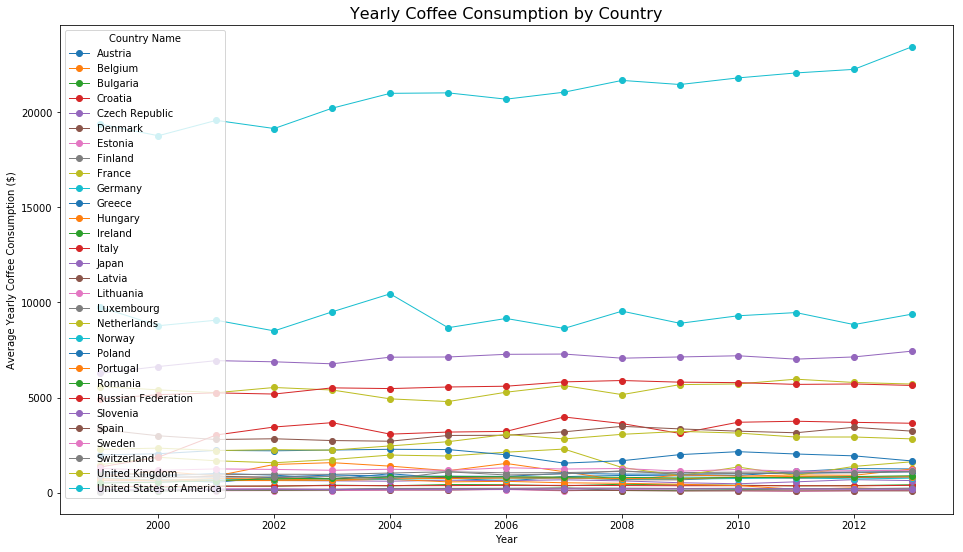

In [242]:
#graph_productivity_by_country = coffee_consumption_pivot.plot(linewidth=1, marker="o")
#plt.plot(year, coffee_consumption_pivot, linewidth=1, marker="o")

lines = coffee_consumption_pivot.plot.line(linewidth=1, marker="o")

#style
#plt.title("Yearly Coffee Consumption by Country",{"fontsize":16})
#graph_productivity_by_country.set_ylabel("Coffee Consumption by Country ($)")
#graph_productivity_by_country.set_xlabel("Year")
plt.title("Yearly Coffee Consumption by Country",{"fontsize":16})
plt.ylabel("Average Yearly Coffee Consumption ($)")
plt.xlabel("Year")
plt.show()

## 3-1. Overall Productivity Trend: Does Productivity Grow by Year? (Growth in labour productivity indicates a higher level of output for every hour worked)
mean productivity (line plot)
x axis = year
y axis = GDPhrwkd
Jin


## 3-2. Productivity Trend by Country: How Does Productivity Change by Country Over Time?
use project_data.csv to generate the plot. (line graph)  - GDP per hour worked
Jin

## 2. Top Coffee Drinking Nations (per Capita, kg or lb): Which Country Drinks Coffee the Most per Person in 20XX?
use project_data.csv to generate the plot. (bar graph) - top 10? 
Srini

## 4. Top Productivity Countries in 20XX: Which Countries Show Higher Productivity Compare to Other Countries?
use project_data.csv to generate the plot. (bubble plot)
x axis = countries
y axis = productivity (GDPhrworkd)
bar graph or scatter plot
all countries in data
Srini

## 5-1. Correlation Between Coffee Consumption and Productivity: Does the amount of Coffee Consumption affect Productivity among countries? (Pick a certain year, ex: 2013)
use project_data.csv to generate the plot. (bubble plot and regression)
x axis = country
y axis = GPDhrwkd
bubble size coffee consumption?
(maybe swap y axis and bubble size?)
maybe a whisker plot - how far away from mean?
total consumption and total GDPhrwkd for selected years (pick maybe two or three to compare?)
Michael

## 5-2. Correlation of Changes in Coffee Consumption and Productivity: Does the Changes in the Coffee Consumption Correlated with the Changes in Productivity throughout Certain period? (dynamic analysis, Pick countries which show bigger changes in values) 
use project_data.csv to generate the plot. (scatter plot and regression)

x axis = country 
y axis = gdphrwkd
calculate the increased/decreased value of consumption
calculate the increased/decreased value of GDPhrwkd
ex: all years or 10 years (if plot is too busy) or in some increment (2 years, 5 years)?
look for dramatic changes
Michael


## 6-1. Correlation Between Coffee Consumption and Productivity: Is P-Value < 0.05 and Can We Reject Null-Hypothesis(H0)? (Hypothesis Test)
P-Value graph
this assumes a single year in 5-1
Andrew

## 6-2. Correlation Between the Changes in the Coffee Consumption and the Changes in Productivity: Is P-Value < 0.05 and Can We Reject Null-Hypothesis(H0)? (Hypothesis Test)

Different from 6-1. 
This is for the "rate of change" in 5-2
Andrew

## 7. Correlation Between Coffee Consumption and Unemployment: A question needs to be defined (optional)
use project_data.csv to generate the plot. 


## 8. World Coffee Major Producers as % of World: Which Countries Produce Coffee? (optional)
use exports data from www.ico.org/new_historical.asp to generate the plot.(pie chart or bubble map??)

## Conclusions
Summary of findings - Andrew

In [ ]:
# DATA Source
http://www.ico.org/new_historical.asp
https://knoema.com/search?query=coffee&source=HomePage
https://www.worldatlas.com/articles/top-10-coffee-consuming-nations.html
https://fusiontables.google.com/DataSource?docid=1C-fn6nSe21acP0xJIO1T1x0wohqfMYCQyJjbqdk#rows:id=1
https://data.oecd.org/lprdty/gdp-per-hour-worked.htm
https://www.oecd-ilibrary.org/employment/data/oecd-productivity-statistics/gdp-per-capita-and-productivity-growth_data-00685-en